# Libraries

In [1]:
import sys
from pathlib import Path

project_root = Path("..").resolve()
sys.path.append(str(project_root / "src"))

### reload the file after changes 

In [18]:
import importlib
import data
# importlib.reload(project_root / "src/data.py")
importlib.reload(data)
print("data module reloaded successfully")

data module reloaded successfully


In [5]:
import numpy as np 
import pandas as pd
from data import load_and_split_data
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_theme(style="whitegrid")

## call the data script

In [7]:
math_path = Path(project_root / "data/student-mat.csv")
portuguese_path = Path( project_root / "data/student-por.csv")

In [8]:

X_train_math, X_val_math, X_test_math, y_train_math, y_val_math, y_test_math = load_and_split_data(math_path)
X_train_port, X_val_port, X_test_port, y_train_port, y_val_port, y_test_port = load_and_split_data(portuguese_path)

data.print_split_shapes(
    "Math",X_train_math, X_val_math, X_test_math,
    y_train_math, y_val_math, y_test_math)

data.print_split_shapes(
    "Portuguese",X_train_port, X_val_port, X_test_port,
    y_train_port, y_val_port, y_test_port)

data.check_missing_data(math_path)
data.check_missing_data(portuguese_path)


Math dataset shapes
----------------------------------------
X_train: (275, 32)
y_train: (275,)
X_val  : (60, 32)
y_val  : (60,)
X_test : (60, 32)
y_test : (60,)

Portuguese dataset shapes
----------------------------------------
X_train: (453, 32)
y_train: (453,)
X_val  : (98, 32)
y_val  : (98,)
X_test : (98, 32)
y_test : (98,)

MISSING VALUES REPORT

--- By Column ---
Clean! No missing values found in any column.

--- By Row ---
Total rows with missing data: 0 out of 395


MISSING VALUES REPORT

--- By Column ---
Clean! No missing values found in any column.

--- By Row ---
Total rows with missing data: 0 out of 649



# EDA 
    - EDA answers: “What will my model struggle with?”

In [9]:
X_train_math.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,...,yes,1,4,2,2,2,1,5,16,15
111,GP,F,16,R,GT3,T,3,3,services,other,...,no,4,1,2,1,1,2,0,7,10
174,GP,F,16,U,LE3,T,3,3,other,other,...,no,4,4,5,1,1,4,4,10,11
319,GP,F,18,U,GT3,T,4,4,teacher,other,...,no,4,4,4,3,3,5,2,11,11
144,GP,M,17,U,GT3,T,2,1,other,other,...,no,5,4,5,1,2,5,0,5,0


the math and Portuguese score data is the same so the main topics will see it in the math Data frame

In [10]:
X_train_port.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
191,GP,M,17,U,GT3,T,3,3,other,other,...,no,4,3,4,1,4,4,4,11,9
333,GP,F,17,U,GT3,T,1,1,services,teacher,...,no,4,3,3,1,1,3,0,13,13
515,MS,F,18,U,LE3,T,1,1,other,at_home,...,no,2,3,5,1,4,3,8,9,8
87,GP,F,15,U,GT3,T,4,2,other,other,...,no,5,3,3,1,3,1,4,15,15
88,GP,M,16,U,GT3,T,2,2,services,other,...,no,4,4,2,1,1,3,6,12,10


## Target Distribution
### let's start with the target column to see its distribution

i want to see the full target so I need to get the full data before i split it

In [11]:
math_df = pd.read_csv(math_path , sep=';')
port_df = pd.read_csv(portuguese_path  , sep=';')

X_math = math_df.drop('G3', axis=1)
y_math = math_df['G3']


X_port = port_df.drop('G3', axis=1)
y_port = port_df['G3']


print(y_math.shape)
print(y_port.shape)

(395,)
(649,)


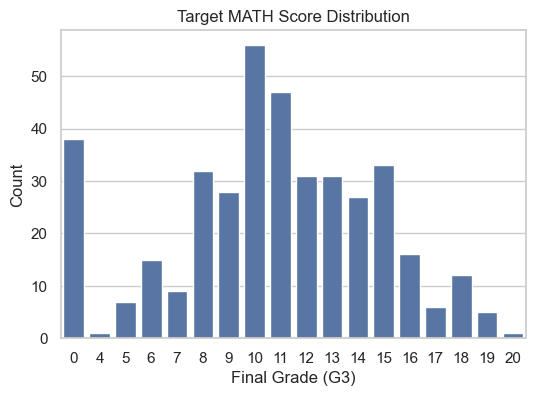

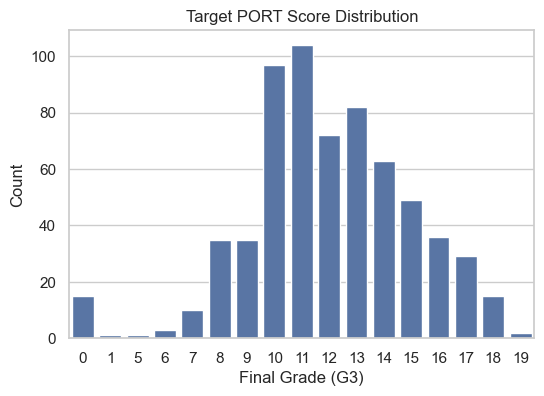

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_math[:])
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.title("Target MATH Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_port[:])
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.title("Target PORT Score Distribution")
plt.show()

`The Math dataset contains a significant number of zero scores, suggesting possible exam absence or failure cases.`

`Predictions at extreme scores (very high / very low) will be less reliable.`

📌 Target Distribution Analysis — Math (G3)

- The Math final grade (G3) ranges from 0 to 20 and exhibits an approximately bell-shaped distribution with a slight right skew.
The majority of students score between 9 and 13, with a noticeable concentration around grades 10–11.

- A significant number of students received a grade of 0, which likely represents exam absence or failure rather than normal score variation. This suggests that zero values may correspond to a distinct subgroup and should be treated carefully during modeling.

- Extreme high scores (18–20) are relatively rare, indicating that predictions at the upper tail may be less reliable.`

📌 Target Distribution Analysis — Portuguese (G3)

- The Portuguese final grade distribution is smoother and closer to a normal distribution compared to Math.
- Most scores fall between 10 and 14, with fewer zero-grade cases.

- The reduced frequency of zeros suggests fewer exam absences or failures, which may lead to more stable model training compared to the Math dataset.

- Overall, the Portuguese target appears less noisy and more evenly distributed.

## Feature Distribution
### PART A — NUMERIC FEATURES

In [25]:
num_cols_math = X_math.select_dtypes(include=["int64", "float64"]).columns
num_cols_port = X_port.select_dtypes(include=["int64", "float64"]).columns
# num_cols_math = num_cols_math.drop("G3")  # drop target
print(X_math[num_cols_math].shape)
print(X_port[num_cols_port].shape)

(395, 15)
(649, 15)


In [41]:
def plot_numeric_distributions(df, num_cols, cols_per_row=3):
    n = len(num_cols)
    rows = int(np.ceil(n / cols_per_row))

    plt.figure(figsize=(cols_per_row * 5, rows * 3))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, cols_per_row, i)

        sns.histplot(
            df[col],
            bins=20,
            kde=True,
            stat="count",
            color="#4C72B0",
            edgecolor="black",
            
        )

        plt.title(col, fontsize=11)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()


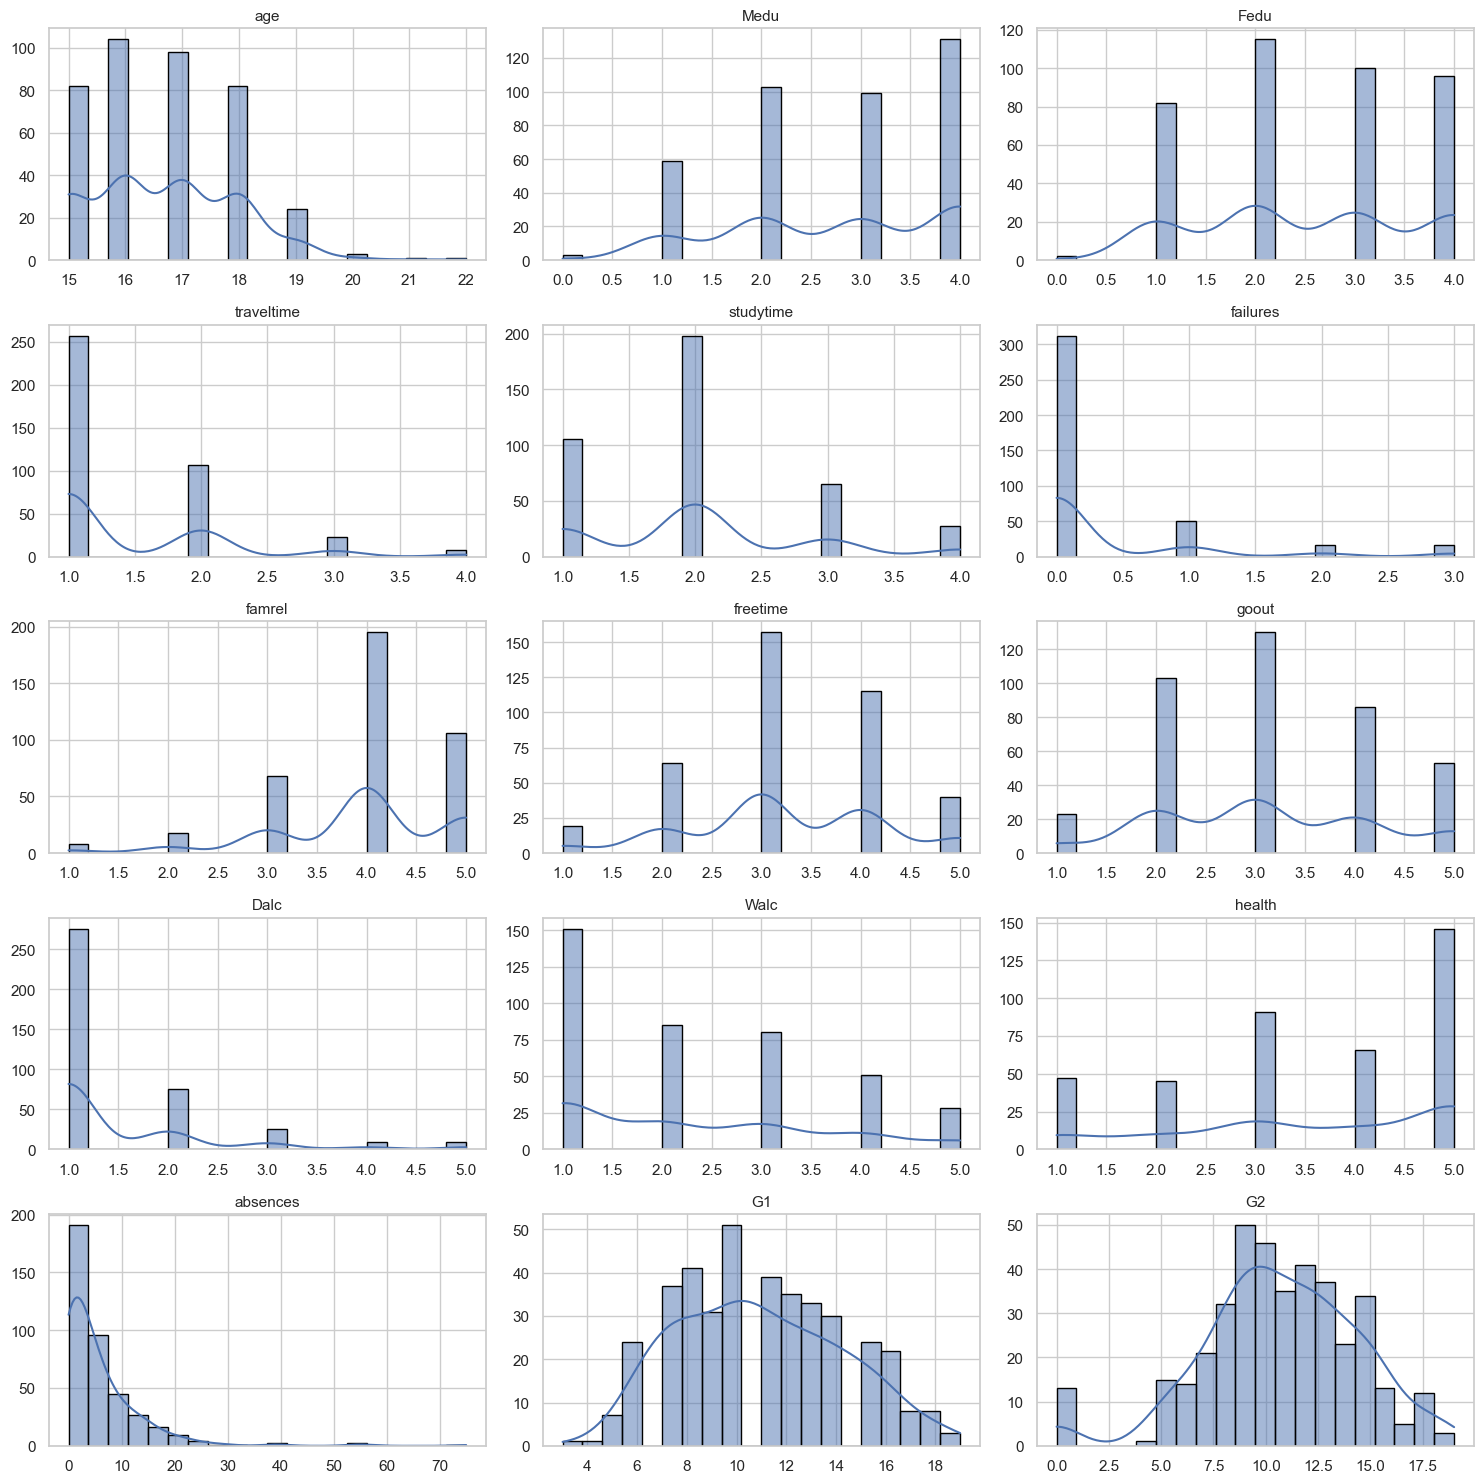

In [42]:
plot_numeric_distributions(X_math, num_cols_math)

In [43]:
def plot_numeric_boxplots(df, num_cols, cols_per_row=3):
    n = len(num_cols)
    rows = int(np.ceil(n / cols_per_row))

    plt.figure(figsize=(cols_per_row * 5, rows * 2.5))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, cols_per_row, i)

        sns.boxplot(
            x=df[col],
            color="#8DA0CB",
            fliersize=3
        )

        plt.title(col, fontsize=11)
        plt.xlabel("")

    plt.tight_layout()
    plt.show()

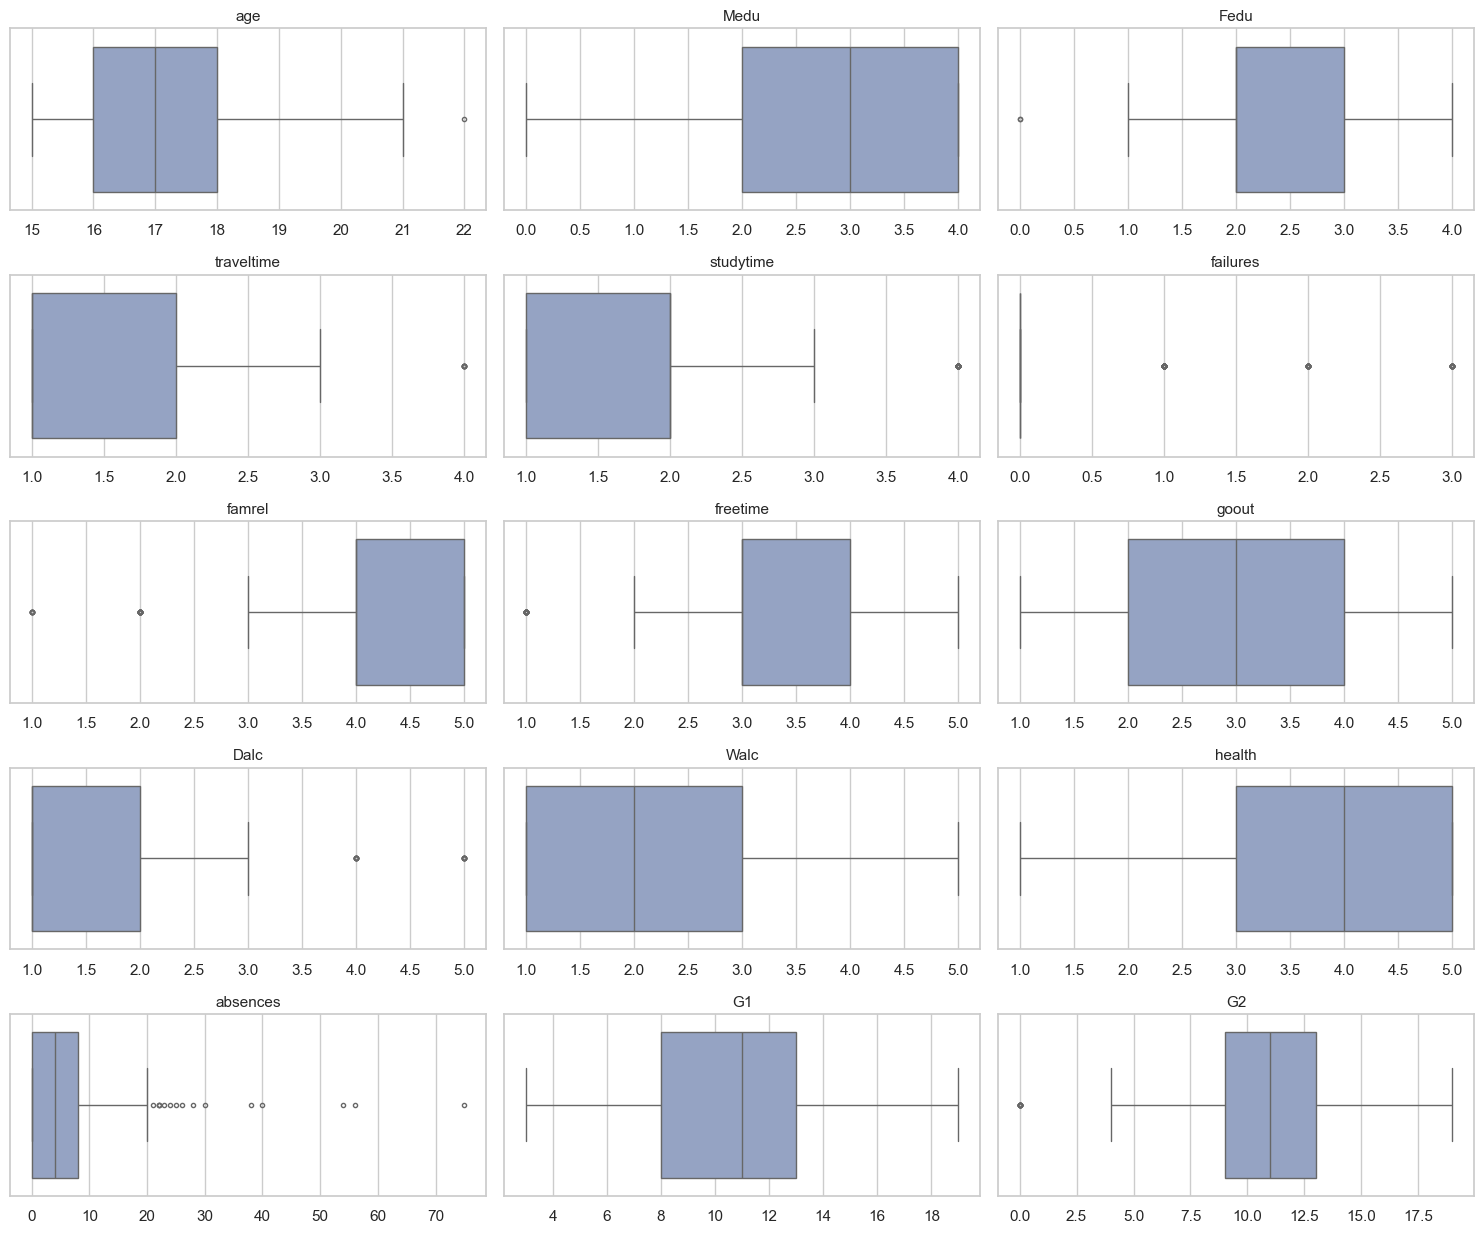

In [47]:
plot_numeric_boxplots(X_math, num_cols_math)

In [ ]:
def plot_ordinal_features(df, cols):
    plt.figure(figsize=(len(cols) * 4, 3))

    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.countplot(x=df[col], color="#4C72B0")
        plt.title(col)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

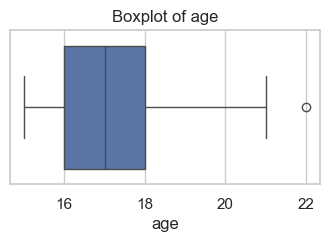

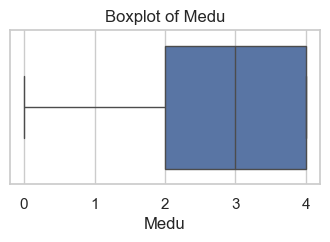

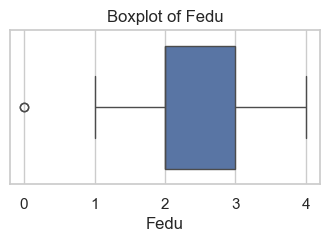

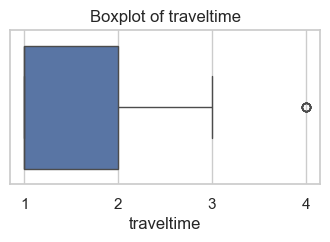

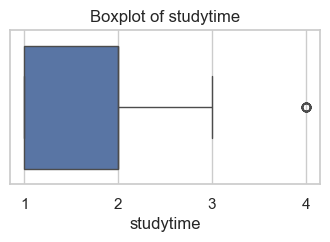

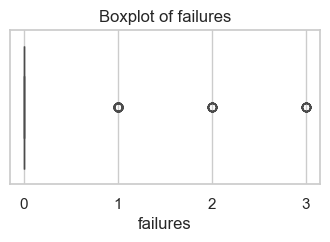

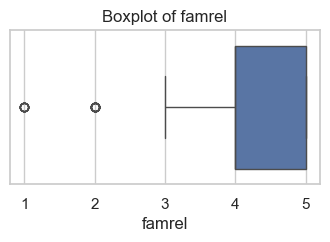

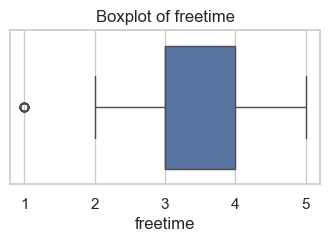

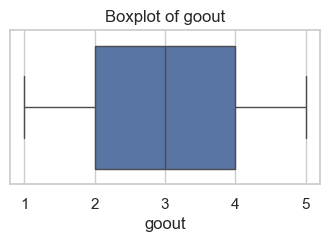

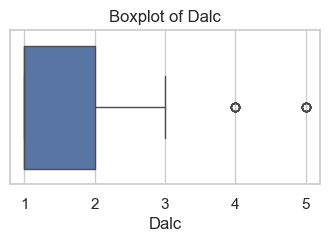

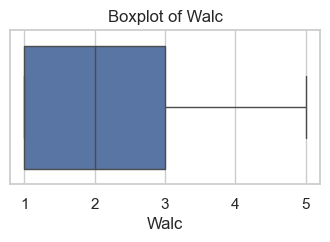

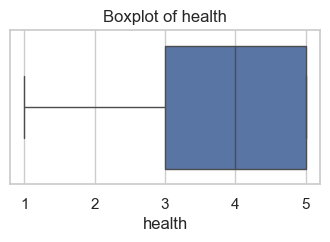

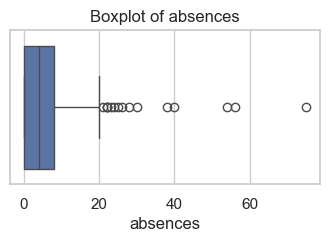

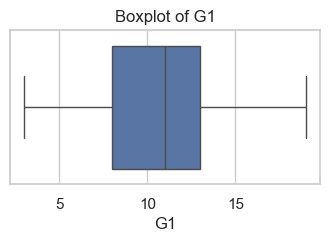

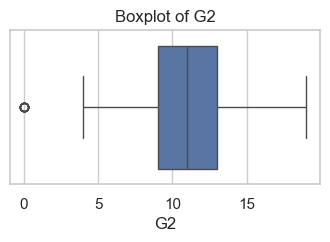

In [27]:
for col in num_cols_math:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=X_math[col])
    plt.title(f"Boxplot of {col}")
    plt.show()